In [140]:
from PIL import Image
import numpy as np

def rgb_to_int(r,g,b):
    return (r<<16) + (g<<8) + b

def getRGBfromI(RGBint):#convert int color code to rgb color code
    blue =  RGBint & 255
    green = (RGBint >> 8) & 255
    red =   (RGBint >> 16) & 255
    return red, green, blue


def read_data(filename):
    x = []
    y = []
    back_color = rgb_to_int(255,255,255)
    
    image = Image.open(filename)
    col,row = image.size
    pixels = image.load()

    for i in range(row):
        for j in range(col):
            r,g,b = pixels[i,j]
            color = rgb_to_int(r,g,b)
            
            if (color != back_color):
                x.append([i,j])
                y.append(color)
    return x,y

def save_data(width, height, pixels, colors):
    
    im = Image.new("RGB", (width, height))
    pix = im.load()
    for i in range(len(pixels)):
             pix[pixels[i][0],pixels[i][1]] = getRGBfromI(colors[i])

    im.save("test.png", "PNG")    

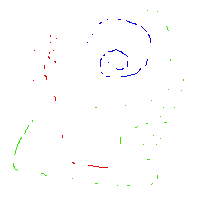

In [141]:
from IPython.display import Image as im
im("data2.png")

In [142]:
x,y = read_data("data2.png")

In [143]:
from sklearn.cross_validation import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [144]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(x_train,y_train)

In [145]:
y_pred = clf.predict(x_test)

from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)


0.98275862068965514

In [146]:
points = []
for i in range (200): 
    for j in range(200):
        points.append([i,j])

pred_colors = clf.predict(points)

save_data(200,200,points,pred_colors)

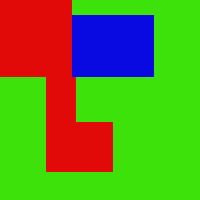

In [147]:
from IPython.display import Image
Image("test.png")